# 데이터 불러오기

In [ ]:
# 경고문 끄기
import warnings
warnings.filterwarnings(action='ignore')

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls /content/drive/MyDrive/강의/배울랑교/신경망교과서/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리

In [2]:
def preprocess(df):
    # DataFrame 내 결측값을 제거한다
    def remove_missing_values(df):
        df = df.dropna()
        return df

    # 요금 이상치를 제거한다 - 0~100
    def remove_fare_amount_outliers(df, lower_bound, upper_bound):
      
        return df

    # 승객 수 이상치를 최빈값(mode)으로 대체한다
    def replace_passenger_count_outliers(df):
      
        return df

    # 위도 경도 이상치를 제거한다
    def remove_lat_long_outliers(df):
        # 뉴욕시 경도 범위
        nyc_min_longitude = -74.05
        nyc_max_longitude = -73.75

        # 뉴욕시 위도 범위
        nyc_min_latitude = 40.63
        nyc_max_latitude = 40.85

        # 뉴욕시 반경 내 위치만 남긴다
        
       
        return df

    df = remove_missing_values(df)
    df = remove_fare_amount_outliers(df, lower_bound=0, upper_bound=100)
    df = replace_passenger_count_outliers(df)
    df = remove_lat_long_outliers(df)
    return df

# 특징 공학

In [3]:
def feature_engineer(df):
    # year(년), month(월), day(일), day_of_week(요일), hour(시간) 변수 생성 
    # -> pickup_datetime 칼럼 지우기
    def create_time_features(df):
        
        return df

    # 유클리드 거리를 계산하는 함수
    def euc_distance(lat1, long1, lat2, long2):
        
        return

    # euc_distance 함수로 이동 거리(distance) 변수 생성
    def create_pickup_dropoff_dist_features(df):
        
        return df

    # euc_distance 함수로 pickup_dist_{airport} 변수 만들기
    # - 출발(lat, long) 지점과 공항과의 거리 변수 추가: pickup_dist_{공항이름}
    # - 도착(lat, long) 지점과 공항과의 거리 변수 추가: dropoff_dist_{공항이름}
    def create_airport_dist_features(df):
        airports = {'JFK_Airport': (-73.78,40.643),
                    'Laguardia_Airport': (-73.87, 40.77),
                    'Newark_Airport' : (-74.18, 40.69)}

        return df

    df = create_time_features(df)
    df = create_pickup_dropoff_dist_features(df)
    df = create_airport_dist_features(df)
    df = df.drop(['key'], axis=1)
    return df

# 적용

In [5]:
filepath = ''
df = pd.read_csv(filepath, nrows=500000)
df.shape

(500000, 8)

In [6]:
df = preprocess(df)
df = feature_engineer(df)

In [7]:
 print(df.shape)
 df.head()

(483427, 18)


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour,distance,pickup_dist_JFK_Airport,dropoff_dist_JFK_Airport,pickup_dist_Laguardia_Airport,dropoff_dist_Laguardia_Airport,pickup_dist_Newark_Airport,dropoff_dist_Newark_Airport
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,0.009436,0.101340,0.092710,0.055043,0.064326,0.337147,0.339123
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,0.079696,0.245731,0.242961,0.157402,0.109925,0.165330,0.220812
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,0.013674,0.234714,0.237050,0.113076,0.122790,0.209742,0.198236
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,0.025340,0.225895,0.240846,0.122792,0.122149,0.197636,0.200358
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,0.019470,0.225847,0.225878,0.098115,0.087741,0.225807,0.242228


# 시각화

In [8]:
landmarks = {'JFK Airport': (-73.78,40.643),
             'Laguardia Airport': (-73.87, 40.77),
             'Midtown': (-73.98, 40.76),
             'Lower Manhattan': (-74.00, 40.72),
             'Upper Manhattan': (-73.94, 40.82),
             'Brooklyn': (-73.95, 40.66)}

def plot_lat_long(df, landmarks, points='Pickup'):
    plt.figure(figsize = (12,12)) # 차트 크기를 설정한다
    if points == 'Pickup':
        plt.plot(list(df.pickup_longitude), list(df.pickup_latitude), '.', markersize=1)
    else:
        plt.plot(list(df.dropoff_longitude), list(df.dropoff_latitude), '.', markersize=1)

    for region, (long, lat) in landmarks.items():
        plt.plot(long, lat, '*', markersize=15, alpha=1, color='r')
        plt.annotate(region, (long+0.005, lat+0.0005), color='r')

    plt.title("{} Locations in NYC Illustrated".format(points))
    plt.grid(None)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

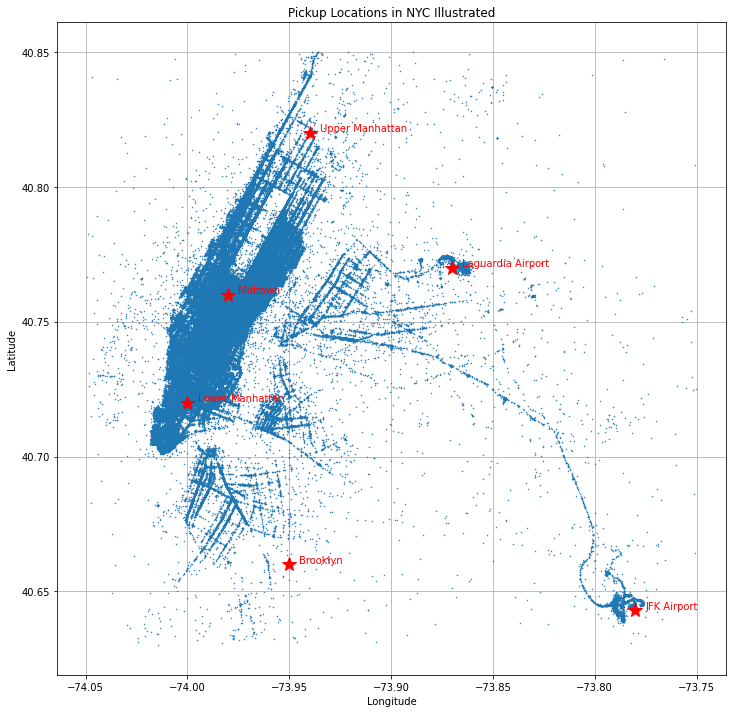

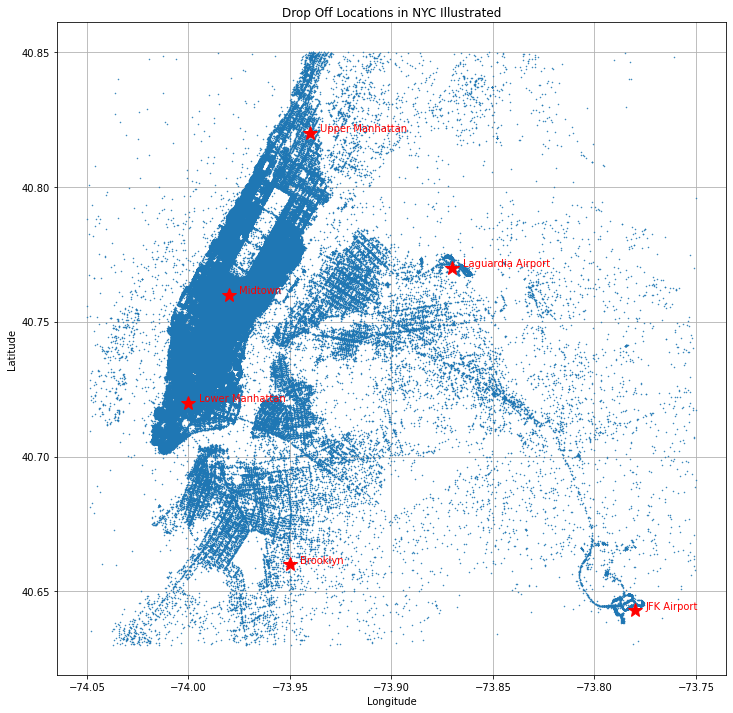

In [9]:
plot_lat_long(df, landmarks, points='Pickup')
plot_lat_long(df, landmarks, points='Drop Off')

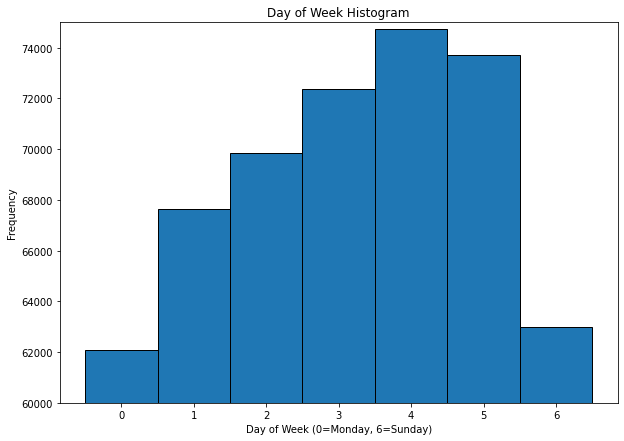

In [10]:
# day_of_week 히스토그램 그리기
df['day_of_week'].plot.hist(bins=np.arange(8)-0.5, 
                            ec='black', 
                            ylim=(60000,75000),
                            figsize=(10, 7))
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.title('Day of Week Histogram')
plt.show()

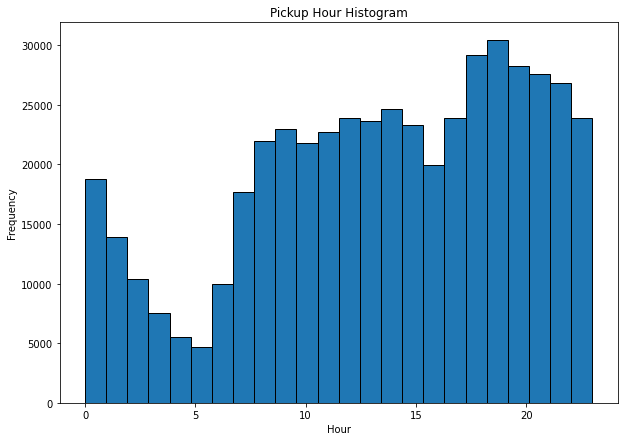

In [11]:
# hour 히스토그램 그리기
df['hour'].plot.hist(bins=24, 
                     ec='black',
                     figsize=(10, 7))
plt.title('Pickup Hour Histogram')
plt.xlabel('Hour')
plt.show()

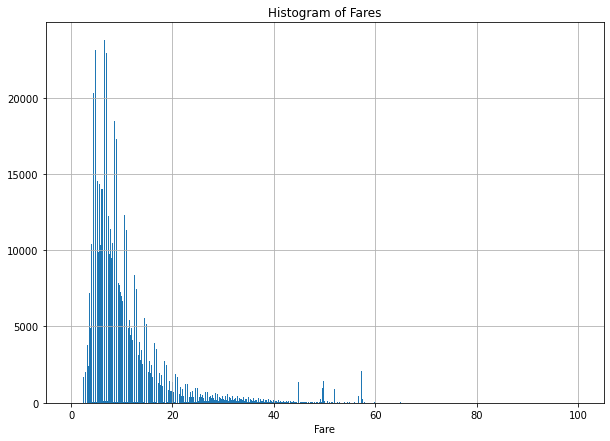

In [12]:
# fare_amount 히스토그램 그리기
df.fare_amount.hist(bins=500, figsize=(10,7))

plt.xlabel("Fare")
plt.title("Histogram of Fares")
plt.show()

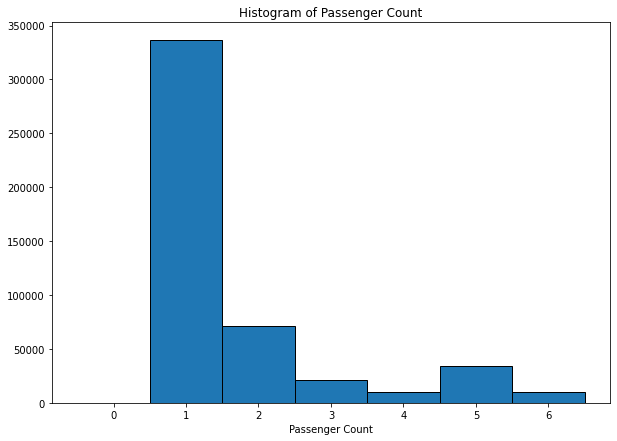

In [13]:
# 승객 수 히스토그램
df['passenger_count'].hist(bins=np.arange(8)-0.5, 
                           ec='black', 
                           grid=False,
                           figsize=(10, 7))
plt.xlabel("Passenger Count")
plt.title("Histogram of Passenger Count")
plt.show()

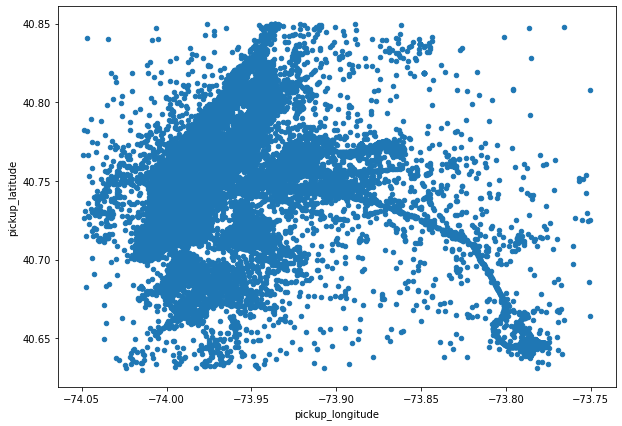

In [14]:
# 위경도 산점도 그리기
df.plot.scatter('pickup_longitude', 'pickup_latitude', figsize=(10,7))
plt.show()

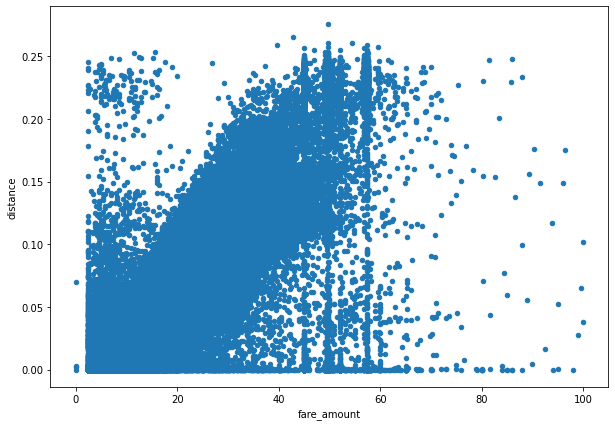

In [15]:
# fare_amount, distance 산점도 그리기
df.plot.scatter('fare_amount', 'distance', figsize=(10,7))
plt.show()

## 퀴즈
* groupby()를 사용하여 아래의 그래프를 그려보자
    * size()

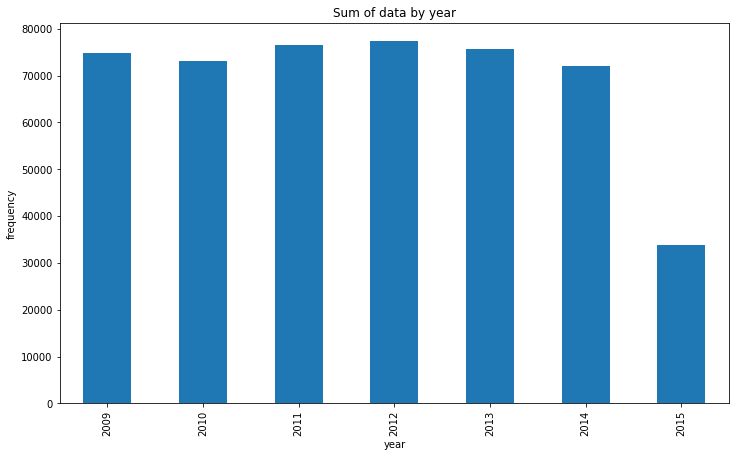

In [16]:
# 연도별 택시 운행 - 2015년의 빈도가 가장 낮은 이유를 찾아보세요.
df.groupby('year').size().plot(kind='bar', figsize=(12,7))
plt.title('Sum of data by year')
plt.ylabel('frequency')
plt.show()

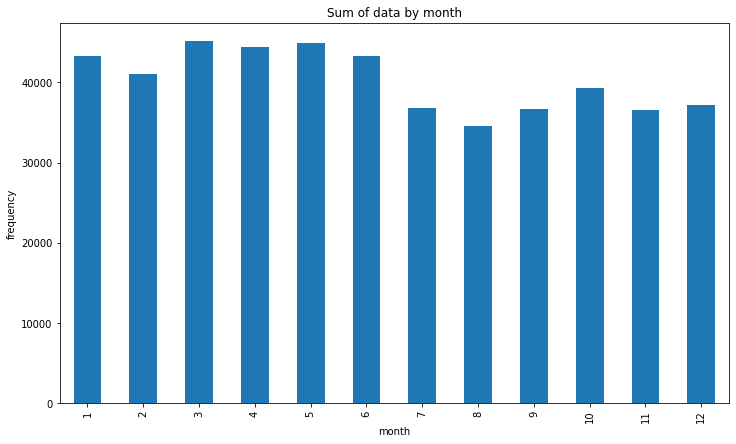

In [17]:
# 월별 택시 운행 합
df.groupby('month').size().plot(kind='bar', figsize=(12,7))
plt.title('Sum of data by month')
plt.ylabel('frequency')
plt.show()

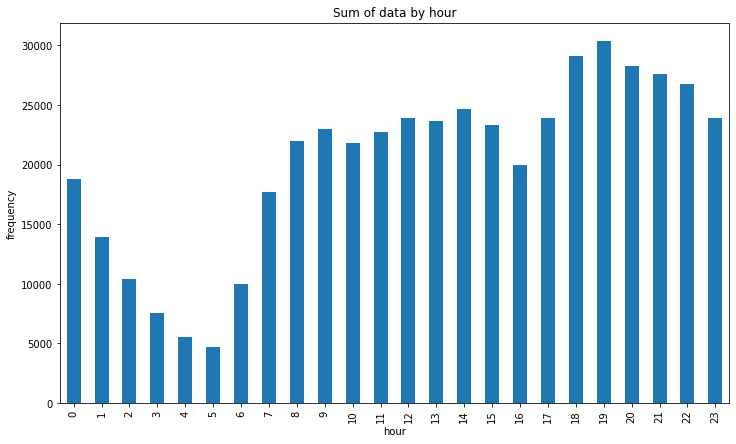

In [18]:
# 시간대별 택시 운행 합
df.groupby('hour').size().plot(kind='bar', figsize=(12,7))
plt.title('Sum of data by hour')
plt.ylabel('frequency')
plt.show()

# 신경망 모델링

## 데이터 표준화(변수 스케일링)

In [19]:
def normalization(df):
    from sklearn.preprocessing import scale

    
    return df

In [20]:
df = normalization(df)
print(df.shape)
df.head()

(483427, 18)


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour,distance,pickup_dist_JFK_Airport,dropoff_dist_JFK_Airport,pickup_dist_Laguardia_Airport,dropoff_dist_Laguardia_Airport,pickup_dist_Newark_Airport,dropoff_dist_Newark_Airport,fare_amount
0,3.916930,-1.128230,4.151170,-1.365544,-0.526894,-1.469613,-0.078206,-0.078224,-1.560814,0.535440,-0.646419,-3.957865,-4.628104,-2.321222,-1.901182,3.494487,3.621456,4.5
1,-1.203467,-1.510232,-0.146055,1.083481,-0.526894,-0.932847,-1.531643,-1.230177,-1.047528,0.381406,1.292346,0.651855,0.632001,1.791579,-0.076302,-1.403330,0.144378,16.9
2,-0.210318,0.395471,-0.519843,-0.020874,0.239920,-0.396082,0.503169,0.267361,-0.020956,-2.083148,-0.529470,0.300109,0.425082,0.010531,0.438549,-0.137324,-0.519141,5.7
3,-0.341267,-0.677272,-0.529989,0.243606,-0.526894,0.140684,-0.659581,0.612947,1.005616,-1.467010,-0.207543,0.018576,0.557969,0.400943,0.412877,-0.482406,-0.456750,7.7
4,0.226268,0.652453,0.559848,1.145228,-0.526894,-0.932847,-0.950268,-0.769396,-1.047528,-1.004906,-0.369548,0.017031,0.033961,-0.590578,-0.964116,0.320637,0.773768,5.3


## 모델 구성

In [21]:
# X, y 입력변수, 목표변수 만들기
X = 
y = 

# train:test - 8:2 데이터 분할
# test:val - 8:2 데이터 분할
from sklearn.model_selection import train_test_split



def predict_taxi_fare_model(X_train, y_train, epochs=1):

    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense





    return model, history

In [22]:
model, history = predict_taxi_fare_model(X_train, y_train, 50)

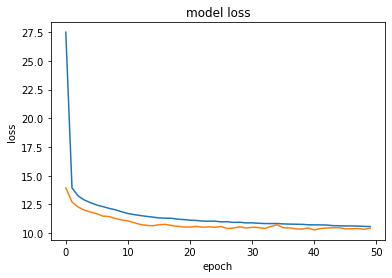

In [30]:
# epochs를 늘려서 학습한 후 loss가 변화는 과정을 시각화 해보세요.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error

train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print(f"학습 RMSE: {train_rmse.round(2)}")
print(f"테스트 RMSE: {test_rmse.round(2)}")

학습 RMSE: 3.25
테스트 RMSE: 3.29
